In [3]:
import tensorflow as tf
from tensorflow import keras

# Load Data

In [14]:
mnst = keras.datasets.fashion_mnist

(raw_train_images, train_labels), (raw_test_images, test_labels) = mnst.load_data()

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Normalize Data

In [15]:
train_images = raw_train_images / 255.0
test_images = raw_test_images / 255.0

# Training

## Configure Model

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [21]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4963 - accuracy: 0.8261
Epoch 2/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3742 - accuracy: 0.8651
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3367 - accuracy: 0.8765
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3122 - accuracy: 0.8849
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2934 - accuracy: 0.8916
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2810 - accuracy: 0.8963
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2685 - accuracy: 0.9000
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2554 - accuracy: 0.9046
Epoch 9/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2473 - accuracy: 0.9077
Epoch 10/10
60

## Evaluate Model

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print("test loss = {}, test acc = {}".format(test_loss, test_acc))

10000/1 - 0s - loss: 0.2649 - accuracy: 0.8809
test loss = 0.34628286809921266, test acc = 0.8809000253677368


# Make Predictions

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [31]:
predictions = model.predict(test_images)

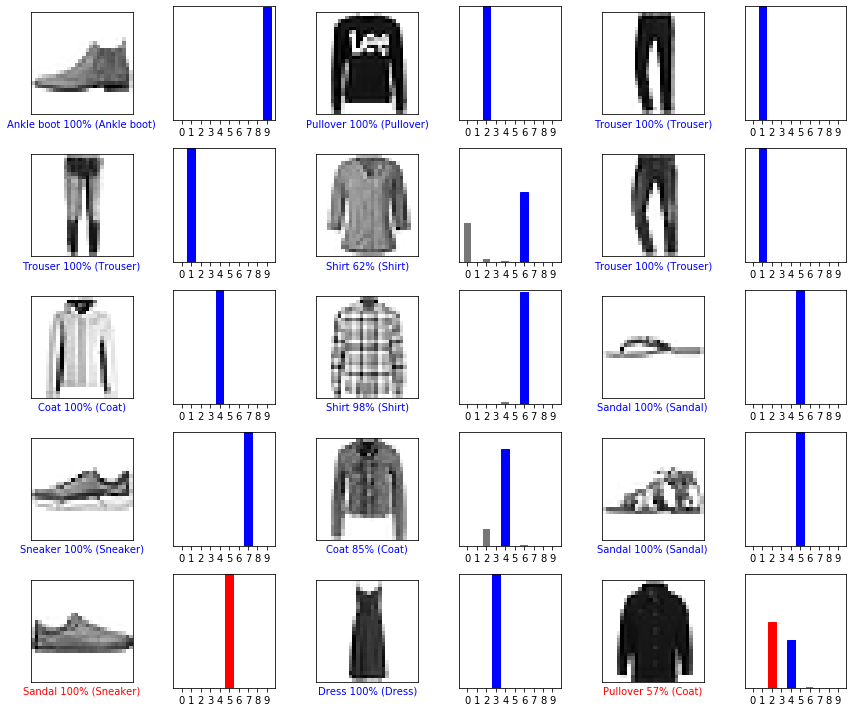

In [32]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

# Saving Models

In [37]:
model.save("model")